In [1]:
import Pkg; Pkg.activate("..")

In [2]:
using QuantumOptics
# using LaTeXStrings
using Plots

gr() # plotlyjs()

Plots.GRBackend()


![](images/IMG_0127.jpg)

The interaction between the molecular vibrations and the photons in the plasmonic cavity is described by the interaction Hamiltonian:
$$
H_I(t) = -\frac{1}{2} \hat{p}(t) \cdot \hat{E}(r_m, t)
$$
where 
- $\hat{p}(t)$ is the time-dependent operators of the quantized molecular polarization
- $\hat{E}(r_m, t)$ is the time-dependent operators of the quantized electric fields evaluated at the molecule’s position $r_m$.


The localized plasmonic resonance with a Lorentzian-like spectral response centered at $\omega_c$ and effective volume $V$, the electromagnetic fields at position $r$ can be expressed as:
$$
E(r,t) = E_0 u_E [\hat{a}(t) u(r) + \hat{a}^\dagger u^{*}(r) ]
$$
where
- $E_0 = \sqrt{\frac{\hbar \omega_c}{2 V \varepsilon_0 \varepsilon}}$
- $u_E$ is a unit vector indicating the polarization
- a and a † are the bosonic annihilation and creation operators of the cavity excitations, or plasmons, oscillating at $\omega_c$ and $-\omega_c$ respectively
- $u(r)$ gives the spatial variation of the electric fields, with $|u(r)| = 1$ at the point of maximum field strength.

On the other hand, the molecular polarization $p(t)$ is also induced by the electric field $\hat{E}(r_m, t)$ according to 
$$
\hat{p}(t) = (L_m)^{\frac{1}{4}} \alpha_L(Q_k) \hat{E}(r_m, t)
$$

where 
- $\alpha_L(Q_k)$ is the polarizability of the molecule, and depends on the normal mode coordinate $Q_k$, which, in the one-dimensional model used throughout this work, corresponds to the physical displacement of atoms in the molecule. 

The polarizability can be expanded around the equilibrium configuration $Q-k = 0$ as
$$
\alpha_L(Q_k) = \alpha_L(0) + \left( \frac{\partial \alpha_L}{\partial Q_K} \right)_{Q_k=0} Q_k + \ldots
$$

The $Q_k$ can be approximated as a displaced harmonic potential. Therefore, the vibrational levels separated by phonon frequency $\omega_m$ can be quantized using the phonon creation and annihilation operators $\hat{b}$ and $\hat{b}^{\dagger}$:
$$
Q_k = Q_k^0(\hat{b} + \hat{b}^{\dagger})
$$

We then obtain the interaction Hamiltonian:
$$
H_I(t) = - A (\hat{b} + \hat{b}^{\dagger})  [\hat{a}(t) u(r) + \hat{a}^\dagger u^{*}(r) ]^2 (u_E \cdot u_k)^2
$$


The complete Hamiltonian:
$$
H = \hbar \omega_m \hat{b}^\dagger \hat{b} +  \hbar \omega_c \hat{a}^\dagger \hat{a} 
- \hbar g_0  \hat{a}^\dagger \hat{a} (\hat{b}^\dagger + \hat{b}) + i \hbar  \Omega (\hat{a}^\dagger e^{-i \omega_1 t} - \hat{a} e^{i \omega_1 t})
$$
where 
- $g_0$ is the single-plasmon optomechanical coupling rate

We need to consider the interaction of the plasmons and the vibrations with the environment. These incoherent effects are included by considering the master equation for the evolution of the density matrix of the system:

$$
\partial_t \rho = \frac{i}{\hbar} [\rho, H] + \frac{\kappa}{2} D_{\hat{a}}[\rho] + \frac{(n_{b}^{th} + 1) \gamma_m}{2} D_{\hat{b}}[\rho] +  \frac{n_{b}^{th}  \gamma_m}{2} D_{\hat{b}^\dagger}[\rho]
$$
where 
- $D_{\hat{O}}[\rho] = 2 \hat{O} \rho \hat{O}^\dagger - \hat{O}^\dagger \hat{O} \rho - \rho \hat{O}^\dagger \hat{O}$ is the Lindblad superoperator
- $\kappa$ is the decay rate if the plasmon
- $\gamma_m$ is the decay rate of the molecular vibration
- $n_{b}^{th} = (e^{\hbar \omega_m /  k_B T} - 1)^{-1}$ is the thermal population of vibrations where $k_B$ is the Boltzmann constant
<!-- - The decay and incoherent pumping of the mechanical vibrations by thermal excitations in the environment at temperature $T$ -->

If the interaction between the plasmonic and vibrational degrees of freedom is weak ($g_0 \ll \kappa$), the coherently pumped cavity will remain very close to the coherent state $\alpha$, with only small fluctuations around it denoted by $\delta a$ ($\hat{a} \rightarrow \alpha + \delta a$). 

Consequently, the vibrational degree of freedom is coherently pumped by the plasmon and the phonon operators can be represented as fluctuations $\delta b$ around the coherent amplitude $\beta$ ($\hat{b} \rightarrow \beta + \delta b$).

The complete Hamiltonian:
$$
H = \hbar \omega_c \hat{a}^\dagger \hat{a} + \hbar \omega_m \hat{b}^\dagger \hat{b}  
- \hbar g_0  \hat{a}^\dagger \hat{a} (\hat{b}^\dagger + \hat{b}) + i \hbar  \Omega (\hat{a}^\dagger e^{-i \omega_1 t} - \hat{a} e^{i \omega_1 t})
$$

Consider the Hamiltonian given by eqn (8) in the main text in the frame rotating with the frequency of the laser $\omega_l$ $\Delta = \omega_c - \omega_l$):
$$
H = \hbar \Delta \hat{a}^\dagger \hat{a} +  \hbar \omega_m \hat{b}^\dagger \hat{b} +  
- \hbar g_0  \hat{a}^\dagger \hat{a} (\hat{b}^\dagger + \hat{b}) + i \hbar \Omega (\hat{a}^\dagger - \hat{a})
$$

![](images/IMG_0126.jpg)

In [3]:

omega_l = 90.0  # Laser frequency
omega_c = 100.0  # Plasmon resonance frequency
omega_m = 10.0  # Phonon resonance frequency

g_0 = 1.       # Single-plasmon optomechanical coupling rate 
Omega = 1.    # Coherent pumping rate 
Delta = omega_c - omega_l  # Cavity-laser detuning 

kappa = 1.0   # Plasmon decay rate 
gamma_m = 0.1  # Phonon decay rate 

n_th_b = 0.0  # Thermal phonon population 

# n_{\dleta b} Incoherent phonon population 
# n_b Phonon population 
# \Gamma_+ Enhancement of phonon creation rate 
# \Gamma_- Enhancement of phonon annihilation rate 
# \Gamma_{opt} Optomechanical damping



0.0

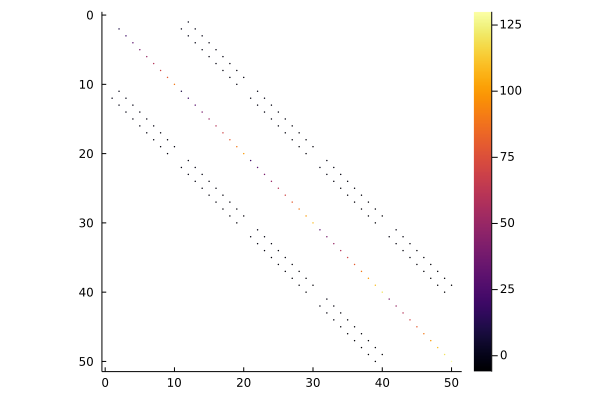

In [4]:
N_a = 10
N_b = 5

# bases
b_a = FockBasis(N_a - 1)
b_b = FockBasis(N_b - 1)

# operators
a = destroy(b_a) ⊗ one(b_b)
b = one(b_a) ⊗ destroy(b_b)

# Hamiltonian
H_a = Delta * dagger(a) * a
H_b = omega_m * dagger(b) * b 
H_int =  - g_0 * (dagger(a) + a) * (dagger(b) + b)
# H_int =  - g_0 * dagger(a) * a * (dagger(b) + b)
H_drive = im * Omega * (dagger(a) - a)

H = H_a + H_b + H_int + H_drive

spy(real(H.data))

In [5]:
J = [a, b, dagger(b)]
rates = [kappa, gamma_m * (1 + n_th_b), gamma_m * n_th_b ];

In [6]:
# initial state
# psi_0 = coherentstate(b_a, 2) ⊗ fockstate(b_b, 0)
psi_0 = fockstate(b_a, 2) ⊗ fockstate(b_b, 0)

tspan = LinRange(0, 25, 1001);



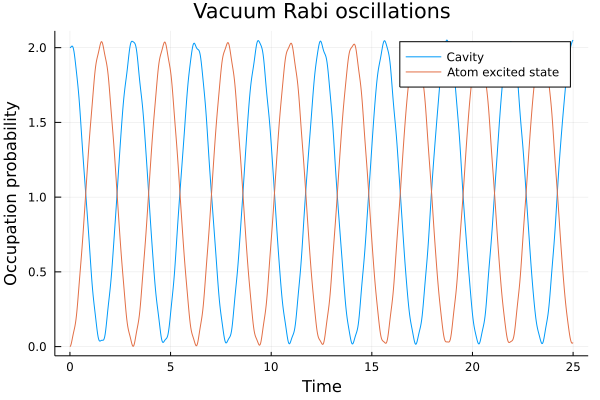

In [7]:
tlist, rho_t = timeevolution.schroedinger(tspan, psi_0, H);

plot(tlist, 
        [real(expect(dagger(a) * a, rho_t)), real(expect(dagger(b) * b, rho_t))]; 
        title="Vacuum Rabi oscillations",    labels=["Cavity" "Atom excited state"],
    xlabel="Time",
    ylabel="Occupation probability",
)


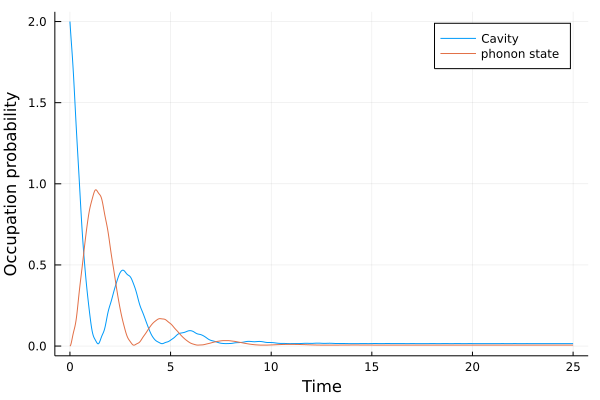

In [8]:
tlist, rho_t = timeevolution.master(tspan, psi_0, H, J, rates=rates);


plot(tlist, real(expect(dagger(a) * a, rho_t)),
    labels="Cavity" ,
    xlabel="Time",
    ylabel="Occupation probability",
)
plot!(tlist, real(expect(dagger(b) * b, rho_t)), 
    labels="phonon state"
)

Emission spectra 
$$
S(\omega) = \omega^4 \int \limits_{-\infty}^{\infty} \mathrm{d}\, t e^{-i \omega t} \left\langle \hat{a}^\dagger (t) \hat{a}(0) \right\rangle_{SS}
$$

In the weak coupling limit the cavity plasmon will decay befor it can cascade down two the vibrational states, and thus the inelastic part of the emission spectrum contains only the single-phonon scattering terms centered around $\omega_1 \pm \omega_m$, with the linewidths of Stokes and anti-Stokes peaks modified by the optomechanical damping $\Gamma_{opt}$:

$$
S(\omega) \propto n_{\delta b} \omega^4 \Gamma_{-} \frac{\Gamma_{opt} + \gamma_m}{(\omega - \omega_1 - \omega_m)^2 + (\Gamma_{opt} + \gamma_m)^2} +
(n_{\delta b} + 1 ) \omega^4 \Gamma_{+} \frac{\Gamma_{opt} + \gamma_m}{(\omega - \omega_1 + \omega_m)^2 + (\Gamma_{opt} + \gamma_m)^2}
$$
Thus, the peak intensities of the Stokes and anti-Stokes emission are given by
$$
S(\omega_{aS}) \propto  \omega^4 \Gamma_{-} \frac{n_{\delta b}}{\Gamma_{opt} + \gamma_m}
$$
$$
S(\omega_{S}) \propto  \omega^4 \Gamma_{+} \frac{n_{\delta b} + 1}{\Gamma_{opt} + \gamma_m}
$$

respectively. The intensities integrated over the widths of emission peaks are 
$$
S(\omega_{aS}) \propto  \omega^4 \Gamma_{-} n_{\delta b}
$$
$$
S(\omega_{S}) \propto  \omega^4 \Gamma_{+} (n_{\delta b} + 1).
$$






Comparison of the anti-Stokes and Stokes ratio
$$
\frac{\tilde{S}(\omega_{aS})}{\tilde{S}(\omega_{S})}
$$

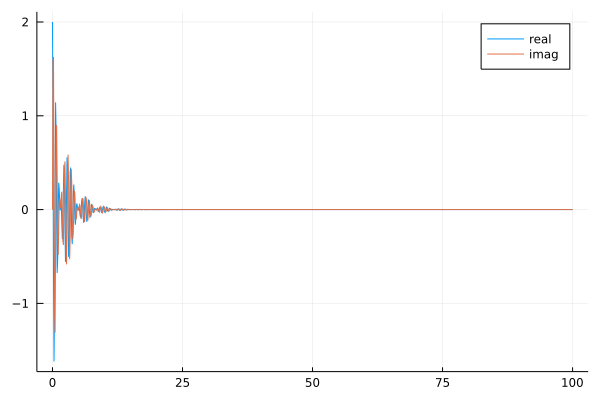

In [15]:
tspan = LinRange(0, 100, 1001);
g = timecorrelations.correlation(collect(tspan), dm(psi_0), H, J, dagger(a), a)

plot(tspan, real(g), label="real")
plot!(tspan, imag(g), label="imag")

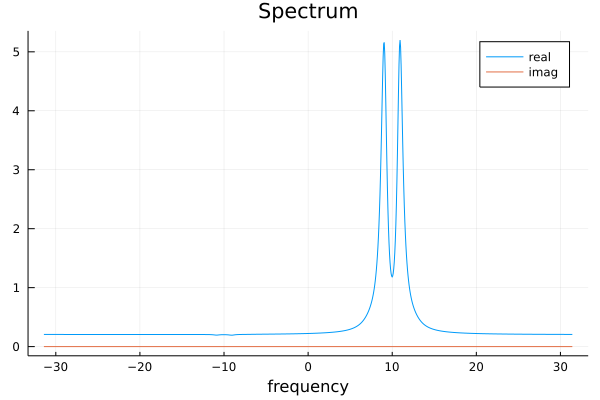

In [17]:
ω, spec = timecorrelations.correlation2spectrum(tspan, g)

plot(ω, real(spec), label="real", xlabel="frequency", title="Spectrum")
plot!(ω, imag(spec), label="imag")

Comparison of the anti-Stokes ato Stokes ratio

![](images/IMG_0125.jpg)

In [14]:
# ωlist = [0:0.1:20;]
# spec = timecorrelations.spectrum(ωlist, H, J, a)
# 
# 
# plot(ω, real(spec), label="real")
# plot!(ω, imag(spec), label="imag")

# Appendix

The Hamiltonian (for simplicity $\hbar = 1$ is chosen):

$$
\hat{H} = \omega_m \delta b^\dagger \delta b + \Delta \delta a^\dagger \delta a - g (\delta a^\dagger + \delta a)(\delta b^\dagger + \delta b)
$$

In [ ]:
N_cav = 4
N_mech = 10

# Basis
b_cav = FockBasis(N_cav)
b_mech = FockBasis(N_mech)

# Operators Cavity
a = destroy(b_cav) ⊗ one(b_mech)
at = create(b_cav) ⊗ one(b_mech)

# Operators Oscillator
b = one(b_cav) ⊗ destroy(b_mech)
bt = one(b_cav) ⊗ create(b_mech);

$$
\tilde S (\omega{aS}) \propto \omega_{aS}^4 \Gamma_{-} n_{\delta b}
$$
$$
\tilde S (\omega{S}) \propto \omega_{aS}^4 \Gamma_{+} (n_{\delta b} + 1)
$$


# Quantum Molecular Optomechanics

Interaction between the molecular vibarains and the photons in the plasmoninc cavity:
$$
H_1 = -\frac{1}{2} \hat p(t) \cdot \hat E(R_m,t) 
$$
where
- $\hat p(t)$ the time-dependent operators of the quantized molecular polarization
- $\hat E(R_m,t)$ the time-dependent operators of the quantized electric field evaluated at the molecular's position $r_m$.

*Note: 1/2 factor in the eq*

The electric field operator of a quantized electromagnetic field is given by 
$$
\hat{\vec{E}}(\vec{r}, t) = \vec{u}_E \sqrt{\frac{\hbar \omega_c}{2 V \varepsilon_0 \varepsilon}}
\left( \hat{a}(t) u(\vec{r}) - \hat{a}^\dagger(t) u^*(\vec{r}) \right)
$$ 

where 
- $\hat{a}^{\dagger}$ ($\hat{a}$) are the bosonic creation (annihilation) operators of the acvity excitations, or plasmons,
- $\vec{u}_E$ is a unit vector indicating polarisation,
- $u(r)$ gives the spatial variation of the electric field,
- $V$ is the mode volume of the cavity. 

*Note: due to the article this is same as a localised plasmonic responance with a Lorentzian-like spectral response ...*


The molecular polarization $\hat p(t)$ is also induced by the electric field $\hat{\vec{E}}(\vec{r}, t)$ accordng to 
$$
\hat p(t) = (L_m)^{1/4} \alpha_L(Q_k) \hat{\vec{E}}(\vec{r}, t)
$$
where
- $L_m = (\varepsilon+2)/3$ is the electromagnetic local field correction ???
- $\alpha_L(Q_k)$ is the polarizability of the molecue and depends on the normal mode coordinate $Q_k$

The polarisability can be expanded around the equilibrium configuration $Q_k = 0$ as
$$
\alpha_L(Q_k) = \alpha_L(0) + \left(\frac{\partial \alpha_L}{\partial Q_k}\right)_{Q_k=0} Q_k + \ldots
$$



Such a system is described by the Hamiltonian (for simplicity $\hbar = 1$ is chosen):

$$
H = \omega_m b^\dagger b + \Delta a^\dagger a - g (a^\dagger + a)(b^\dagger + b)
$$

where the constants are
* $\omega_m$ is the frequency of the mechanical oscillator,
* $\Delta = \omega_L - \omega_c$ is the frequency by which the pump laser is detuned from the cavity frequency,
* $g = |\alpha| g_0$ is the coupling constant of the cavity with the oscillator.


In such a system we can cool the mechanical oscillator by red-shifting the laser by $\omega_m$ relative to the cavity frequency. To simulate this behavior the needed libraries have to be imported first.

In [ ]:
# Parameters
Δ = 10.0
ω_m = 10.0

# Constants
# the interaction between plasmonic and vibrational degrees of freedom is week (g << κ)
g = 0.1  # coupling 
κ = 1.   # is the photon decay rate of the cavity
γ = 1.   # decay rate of the molecular vibration


n_th = 2 * 1.  # thermal population of vibrational mode (average thermal phonon number of bath.)

It is useful to write the system basis as pairs of coupled Fockstates $| n\rangle \otimes |m\rangle$, where the first is the state of the cavity and the second is the state of the oscillator. For this we define the basis for each and also define their ladder operators.

In [ ]:
N_cav = 4
N_mech = 10

# Basis
b_cav = FockBasis(N_cav)
b_mech = FockBasis(N_mech)

# Operators Cavity
a = destroy(b_cav) ⊗ one(b_mech)
at = create(b_cav) ⊗ one(b_mech)

# Operators Oscillator
b = one(b_cav) ⊗ destroy(b_mech)
bt = one(b_cav) ⊗ create(b_mech);

Using the above operators and parameters the Hamilton operator for the system can be defined as follows:

In [ ]:
# Hamilton operator
H_cav = Δ * at * a 
H_mech = ω_m * bt * b
H_int = -g * (at + a) * (bt + b) # eq 15.
# H_int = -g * (at * b + a * bt) # RWA

H = H_cav + H_mech + H_int;

Since we also want to model photon decay in the cavity we can define the needed jump operator and associated rates. We also define the initial state to be $|\psi_0\rangle = |0\rangle \otimes | 2\rangle$

In [ ]:
J     = [a, b, bt]
rates = [κ, (n_th + 1)* γ / 2 , n_th * γ / 2 ]

ψ0 = fockstate(b_cav, 0) ⊗ fockstate(b_mech, 2);

Given all the above the system is fully specified, and the master equation can be solved.

In [ ]:
tspan = (0, 40)
tlist = LinRange(tspan..., 501)
tout, ρt = timeevolution.master(tlist, ψ0, H, J; rates=rates);

To see the cooling behavior mentioned above we need to look at the expected phonon number of the oscillator over time. This can be easily plotted using the following. 

In [ ]:
L"\langle n_m \rangle"

In [ ]:
plot(
    plot(
        tlist, real(expect(bt * b, ρt));
        title="Mechanical Oscillator",
        ylabel=L"\langle n_m \rangle"

    ),
    plot(
        tlist, real(expect(at * a, ρt));
        title="Cavity",
        ylabel=L"\langle n_{c} \rangle"
    ),
    xlabel=L"t \kappa"
)

As expected optomechanical cooling yields an exponential decay of the expected phonon number in the mechanical oscillator. The small oscillations of the cavity curve exhibit the same period as the mechanical oscillator.

To calculate the final expected phonon and photon number directly, we can look at the steady state of the system.

In [ ]:
ρ_end = steadystate.eigenvector(H, sqrt.(rates) .* J; which=:SM)

println("⟨n_m⟩ = ", real(expect(bt*b,ρ_end)))
println("⟨n_c⟩ = ", real(expect(at*a,ρ_end)))

**Remark**: If `H` and `J` are sparse, then the function used to diagonalize the Lindblad term is Julia's `eigs`. While this algorithm is efficient, it can produce misleading results or even fail depending on the options that are set. The `steadystate.eigenvector` function tries to ensure that only fully correct results are produced, throwing an error otherwise. This is why above (and in the following) we set the `eigs` keyword argument `which=:SM`. The values of `which` and other kwargs (such as `nev`) may have to be changed depending on the given problem. For all options, see [Julia's documentation](https://docs.julialang.org/en/v0.6.2/stdlib/linalg/#Base.LinAlg.eigs-Tuple{Any}).

Earlier we made the choice to cool using the laser red shifted by $\omega_m$. This value was chosen because the strongest cooling can be achieved here. This resonance can be visualized by finding the resulting phonon number, while cooling with different frequency shifts. The result below shows an obvious resonance around $\omega_m$. It can also be seen that the cooling depends on the pump strength $\eta$.

In [ ]:
# # figure(figsize=(6, 4))
# plot()
# detune = [-18:0.3:-3;]
# for η1 = [1., 2., 4., 6.]
#     n_end = []
#     for det = detune
#         H_det = -det * at * a + H_mech + H_int + η1 * (a + at)
#         ρ = steadystate.eigenvector(H_det, sqrt.(rates) .* J; which=:SM)
#         push!(n_end, real(expect(bt * b, ρ)))
#     end
    
#     plot(detune ./ ω_mech, n_end, label="η = $η1")
# end

# xlabel(L"\Delta\ / \omega_m")
# ylabel(L"\langle n_m \rangle")
# title("final photon number of the mechanical oscillator")



In [ ]:
# figure(figsize=(6, 4))

# detune = [-18:0.3:-3;]
# for η1 = [1., 2., 4., 6.]
#     n_end = []
#     for det = detune
#         H_det = -det*at*a + H_mech + H_int + η1*(a + at)
#         ρ = steadystate.eigenvector(H_det, sqrt.(rates).*J;which=:SM)
#         push!(n_end, real(expect(bt*b, ρ)))
#     end
    
#     plot(detune./ω_mech, n_end, label="η = $η1")
# end

# xlabel(L"\Delta\ / \omega_m")
# ylabel(L"\langle n_m \rangle")
# title("final photon number of the mechanical oscillator")

# legend();